<a href="https://colab.research.google.com/github/rynedaniels/project_2/blob/main/Project2_part_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/my_files/spanish_wines.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
df = df.drop_duplicates()

In [6]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

<Axes: >

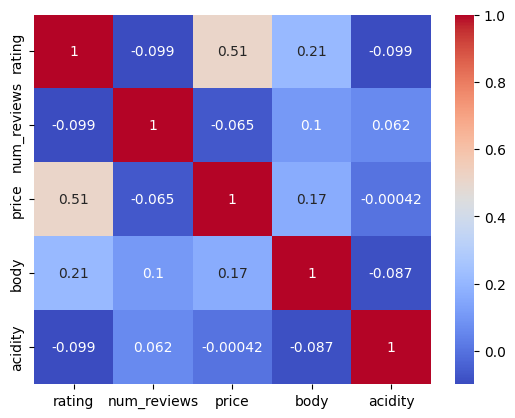

In [7]:
wine_corr = df.corr()
sns.heatmap(wine_corr, annot=True, cmap='coolwarm')

In [21]:
filtered_df = df[(df['rating'] >= 4.6) & (df['price'] >= 1000)]


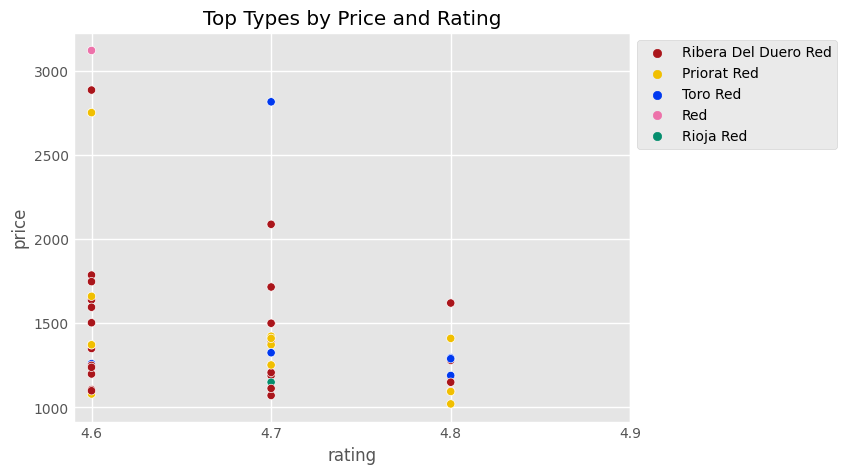

In [50]:
plt.style.use('ggplot')
custom_colors = {
    'Ribera Del Duero Red': '#AA151B',
    'Priorat Red': '#F1BF00',
    'Toro Red': '#0039F0',
    'Red': '#ED72AA',
    'Rioja Red': '#058E6E'
}

# flag_colors src: https://www.schemecolor.com/spain-flag-colors.php

sns.scatterplot(data=filtered_df, x='rating', y='price', hue='type',palette=custom_colors)
plt.xticks([4.6,4.7,4.8,4.9])
plt.yticks([1000,1500,2000,2500,3000])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Top Types by Price and Rating")
plt.show()



In [40]:
avg_rating_region = df.groupby('region')['price'].mean()

avg_rating_region_df = avg_rating_region.reset_index()

avg_rating_region_df.columns = ['region', 'price']

avg_rating_region_df.sort_values(by='price',ascending=False)

,region,price
8,Bierzo,265.343077
57,Ribera del Duero,210.590876
69,Toro,204.299268
53,Priorato,203.550070
74,Vino de Espana,190.985333
...,...,...
1,Alella,19.097500
66,Tarragona,18.175000
3,Almansa,17.555714
0,Abona,11.990000


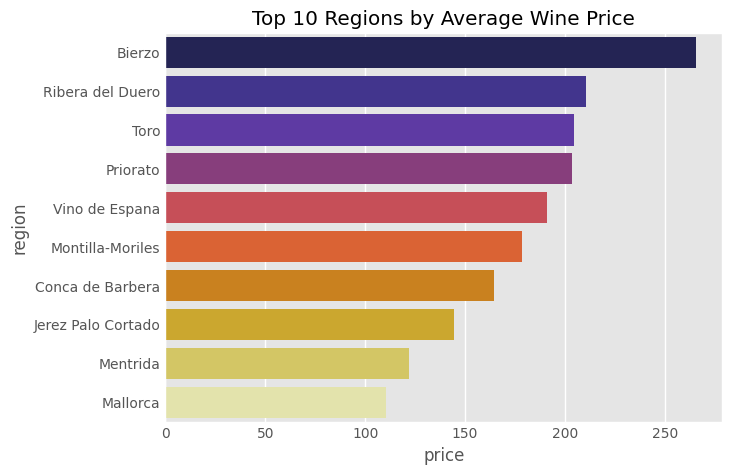

In [52]:
top_10_regions = avg_rating_region_df.sort_values(by='price', ascending=False).head(10)
sns.barplot(data=top_10_regions, x='price', y='region', palette='CMRmap')
plt.title("Top 10 Regions by Average Wine Price")
plt.show()